<a href="https://colab.research.google.com/github/Panagiotis-Bosinas/Machine_Learning_Assignments/blob/main/Ergasia9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

## Ερώτημα 1

In [42]:
!pip install swig
!pip install gymnasium[box2d]
!pip install stable-baselines3[extra]
!pip install renderlab

In [43]:
import matplotlib.pyplot as plt
import gymnasium as gym
import stable_baselines3
from stable_baselines3 import DQN, PPO
import numpy as np
import time

## Ερώτημα 2

Η συνάρτηση reset οδηγεί τον πράκτορα να εκτελέσει την επιλεγμένη ενέργεια και δίνει σαν έξοδο στον πράκτορα ένα καινούριο observation και το reward.

Η συνάρτηση reset θέτει το περιβάλλον σε μία αρχική κατάσταση και προσφέρει στον πράκτορα το πρώτο observation.

Η συνάρτηση render δημιουργεί μία οπτικοποίηση του περιβάλλοντος.

## Ερώτημα 3

Το Observation Space του LunarLander-v2 είναι ένα διάνυσμα 8x1 και το Action Space 4 διακριτά actions. Τα rewards είναι οι ανταμοιβές που λαμβάνει ο πράκτορας ανάλογα την ενέργεια στην οποία προβαίνει

## Ερώτημα 4,5

In [44]:
env = gym.make("LunarLander-v3")
scores = []

for episode in range(5):
    obs, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = env.action_space.sample()
        obs, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        done = terminated or truncated

    scores.append(total_reward)

env.close()
print("Average reward:", sum(scores)/len(scores))

Average reward: -104.94932486683012


## Ερώτημα 6

In [45]:
env_dqn = gym.make("LunarLander-v3")
start_time = time.time()
dqn = DQN("MlpPolicy", env_dqn, verbose=1)
dqn.learn(total_timesteps=200000)

dqn_rewards = []
dqn_training_time = time.time() - start_time
for episode in range(5):
    obs, info = env_dqn.reset()
    done = False
    total_reward = 0

    while not done:
        action, _ = dqn.predict(obs,deterministic=True)
        obs, reward, terminated, truncated, info = env_dqn.step(action)
        total_reward += reward
        done = terminated or truncated

    dqn_rewards.append(total_reward)

print("DQN rewards per episode:", dqn_rewards)
print("DQN average reward:", np.mean(dqn_rewards))


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91       |
|    ep_rew_mean      | -118     |
|    exploration_rate | 0.983    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1278     |
|    time_elapsed     | 0        |
|    total_timesteps  | 364      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.896    |
|    n_updates        | 65       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83       |
|    ep_rew_mean      | -139     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1079     |
|    time_elapsed     | 0        |
|    total_timesteps  | 664      |
| train/              |        

In [46]:
env_ppo = gym.make("LunarLander-v3")
start_time = time.time()
ppo = PPO("MlpPolicy", env_dqn, verbose=1)
ppo.learn(total_timesteps=200000)

ppo_rewards = []
ppo_training_time = time.time() - start_time
for episode in range(5):
    obs, info = env_ppo.reset()
    done = False
    total_reward = 0

    while not done:
        action, _ = ppo.predict(obs)
        obs, reward, terminated, truncated, info = env_ppo.step(action)
        total_reward += reward
        done = terminated or truncated

    ppo_rewards.append(total_reward)

print("PPO rewards per episode:", ppo_rewards)
print("PPO average reward:", np.mean(ppo_rewards))

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88.8     |
|    ep_rew_mean     | -141     |
| time/              |          |
|    fps             | 741      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 89.6         |
|    ep_rew_mean          | -140         |
| time/                   |              |
|    fps                  | 655          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0054750973 |
|    clip_fraction        | 0.0128       |
|    clip_range           | 0.2          |
|    en

## Ερώτημα 7

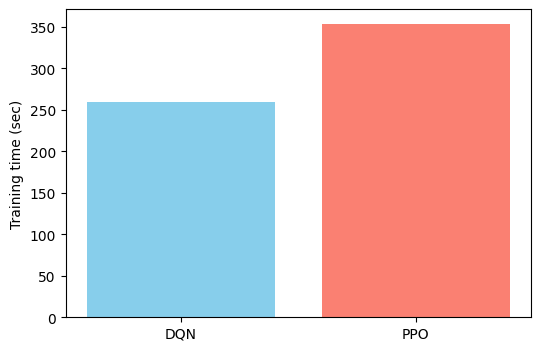

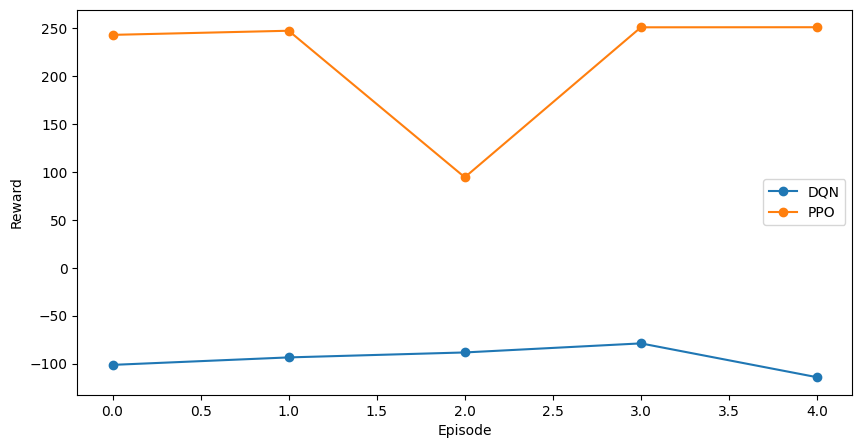

In [47]:
plt.figure(figsize=(6,4))
plt.bar(['DQN', 'PPO'], [dqn_training_time, ppo_training_time], color=['skyblue', 'salmon'])
plt.ylabel('Training time (sec)')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(dqn_rewards, label='DQN', marker='o')
plt.plot(ppo_rewards, label='PPO', marker='o')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

Για τον ίδιο αριθμό επαναλήψεων, ο PPO αλγόριθμος απαιτεί μεγαλύτερο χρόνο εκτέλεσης αλλά εμφανίζει σημαντικά καλύτερη επίδοση

## Ερώτημα 8

In [48]:
env_dqn = gym.make("LunarLander-v3")
start_time = time.time()
dqn = DQN(
    "MlpPolicy",
    env,
    learning_rate=2.5e-4,
    buffer_size=100_000,
    batch_size=128,
    gamma=0.99,
    target_update_interval=250,
    train_freq=1,
    exploration_fraction=0.5,
    exploration_final_eps=0.05,
    learning_starts=1000,
    verbose=1
)

dqn.learn(total_timesteps=200000)

dqn_rewards = []
dqn_training_time = time.time() - start_time
for episode in range(5):
    obs, info = env_dqn.reset()
    done = False
    total_reward = 0

    while not done:
        action, _ = dqn.predict(obs,deterministic=True)
        obs, reward, terminated, truncated, info = env_dqn.step(action)
        total_reward += reward
        done = terminated or truncated

    dqn_rewards.append(total_reward)

print("DQN rewards per episode:", dqn_rewards)
print("DQN average reward:", np.mean(dqn_rewards))

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.8     |
|    ep_rew_mean      | -153     |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3390     |
|    time_elapsed     | 0        |
|    total_timesteps  | 379      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.6     |
|    ep_rew_mean      | -216     |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3167     |
|    time_elapsed     | 0        |
|    total_timesteps  | 781      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.8     |
|    ep_rew_mean      | -224   

In [49]:
env_ppo = gym.make("LunarLander-v3")
start_time = time.time()
ppo = PPO(
    "MlpPolicy",
    env,
    learning_rate=2.5e-4,
    n_steps=128,
    batch_size=128,
    gamma=0.99,
    gae_lambda=0.95,
    ent_coef=0.01,
    vf_coef=0.5,
    max_grad_norm=0.5,
    verbose=1
)
ppo.learn(total_timesteps=200000)

ppo_rewards = []
ppo_training_time = time.time() - start_time
for episode in range(5):
    obs, info = env_ppo.reset()
    done = False
    total_reward = 0

    while not done:
        action, _ = ppo.predict(obs)
        obs, reward, terminated, truncated, info = env_ppo.step(action)
        total_reward += reward
        done = terminated or truncated

    ppo_rewards.append(total_reward)

print("PPO rewards per episode:", ppo_rewards)
print("PPO average reward:", np.mean(ppo_rewards))

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 369          |
|    ep_rew_mean          | 145          |
| time/                   |              |
|    fps                  | 687          |
|    iterations           | 1326         |
|    time_elapsed         | 247          |
|    total_timesteps      | 169728       |
| train/                  |              |
|    approx_kl            | 0.0006349394 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.574       |
|    explained_variance   | -0.21        |
|    learning_rate        | 0.00025      |
|    loss                 | 286          |
|    n_updates            | 13250        |
|    policy_gradient_loss | 0.00247      |
|    value_loss           | 598          |
------------------------------------------
------------------------------------------

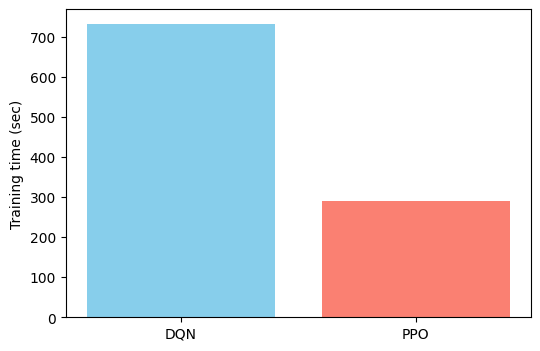

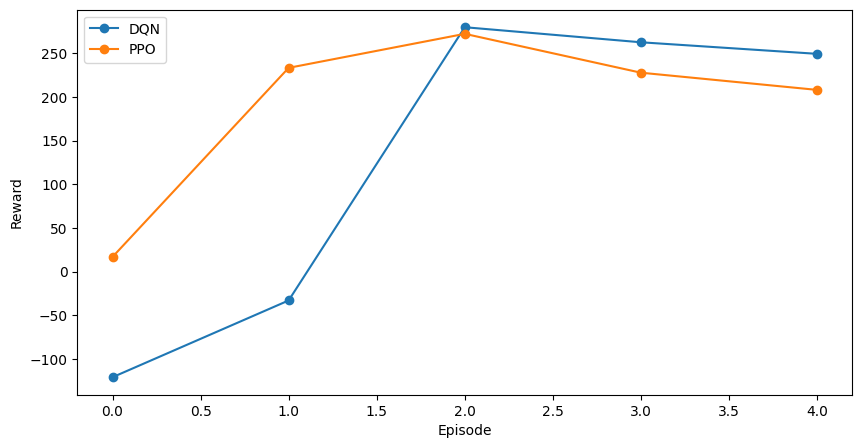

In [50]:
plt.figure(figsize=(6,4))
plt.bar(['DQN', 'PPO'], [dqn_training_time, ppo_training_time], color=['skyblue', 'salmon'])
plt.ylabel('Training time (sec)')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(dqn_rewards, label='DQN', marker='o')
plt.plot(ppo_rewards, label='PPO', marker='o')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()


Με τις προσαρμοσμένες παραμέτρους, ο DQN έχει μεγαλύτερο χρόνο εκτέλεσης αλλά και οι δύο αλγόριθμοι φαίνεται να έχουν την ίδια απόδοση.